In [94]:
#1.อ่านไฟล์ csv
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import chi2_contingency
import seaborn as sns
import numpy as np


df = pd.read_csv('exercise_data_full.csv')
print(df.head(10))

   Duration  Average_Pulse  Max_Pulse  Calorie_Burnage  Hours_Work  \
0        60            110        130              409         0.0   
1        60            117        145              479         0.0   
2        60            103        135              340         8.0   
3        45            109        175              282         8.0   
4        45            117        148              406         0.0   
5        60            102        127              300         0.0   
6        60            110        136              374         0.0   
7        45            104        134              253         0.0   
8        30            109        133              195         8.0   
9        60             98        124              269         7.5   

   Hours_Sleep  
0          8.0  
1          8.0  
2          7.5  
3          8.0  
4          6.5  
5          7.5  
6          7.5  
7          9.0  
8          8.0  
9          8.0  


In [64]:
#2.ทำความสะอาดข้อมูล

#2.1 ตรวจสอบข้อมูลที่หายไป
import pandas as pd
df = pd.read_csv('exercise_data_full.csv')
print(df.isnull().sum())

# ไม่พบข้อมูลที่เป็น missing value

Duration           0
Average_Pulse      0
Max_Pulse          0
Calorie_Burnage    0
Hours_Work         0
Hours_Sleep        0
dtype: int64
     Duration  Average_Pulse  Max_Pulse  Calorie_Burnage  Hours_Work  Hours_Sleep
0          60            110        130              409         0.0          8.0
1          60            117        145              479         0.0          8.0
2          60            103        135              340         8.0          7.5
3          45            109        175              282         8.0          8.0
4          45            117        148              406         0.0          6.5
5          60            102        127              300         0.0          7.5
6          60            110        136              374         0.0          7.5
7          45            104        134              253         0.0          9.0
8          30            109        133              195         8.0          8.0
9          60             98        124  

In [65]:
#3.เรียกดูชนิดข้อมูล
print(df.dtypes)

Duration             int64
Average_Pulse        int64
Max_Pulse            int64
Calorie_Burnage      int64
Hours_Work         float64
Hours_Sleep        float64
dtype: object


In [73]:
#4.สรุปข้อมูล
print(df.info()) # แสดงข้อมูลทั่วไปเกี่ยวกับ DataFrame เช่น จำนวนแถวและ Column, ชนิดข้อมูล
print(df.corr()) # การตรวจสอบความสัมพันธ์ระหว่าง Column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Duration         163 non-null    int64  
 1   Average_Pulse    163 non-null    int64  
 2   Max_Pulse        163 non-null    int64  
 3   Calorie_Burnage  163 non-null    int64  
 4   Hours_Work       163 non-null    float64
 5   Hours_Sleep      163 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 7.8 KB
None
                 Duration  Average_Pulse  Max_Pulse  Calorie_Burnage  \
Duration         1.000000      -0.165347   0.000895         0.888055   
Average_Pulse   -0.165347       1.000000   0.785566         0.017576   
Max_Pulse        0.000895       0.785566   1.000000         0.195850   
Calorie_Burnage  0.888055       0.017576   0.195850         1.000000   
Hours_Work      -0.115027      -0.275493  -0.266639        -0.139936   
Hours_Sleep      0.074435       0.034102 

In [43]:
#5.อธิบายค่าสถิติที่ได้จากการสรุปข้อมูลคร่าวๆ
# count: จำนวนค่าที่ไม่เป็นค่าว่างในแต่ละ Column
# mean: ค่าเฉลี่ยของแต่ละ Column
# std: ส่วนเบี่ยงเบนมาตรฐานของแต่ละ Column
# min: ค่าต่ำสุดของแต่ละ Column
# 25%: ค่าร้อยละที่ 25 ของแต่ละ Column
# 50% (median): ค่าร้อยละที่ 50 ของแต่ละ Column (ค่ากลาง)
# 75%: ค่าร้อยละที่ 75 ของแต่ละ Column
# max: ค่าสูงสุดของแต่ละ Column
print(df.describe())

         Duration  Average_Pulse   Max_Pulse  Calorie_Burnage  Hours_Work  \
count  163.000000     163.000000  163.000000       163.000000  163.000000   
mean    64.263804     107.723926  134.226994       382.368098    4.386503   
std     42.994520      14.625062   16.403967       274.227106    3.923772   
min     15.000000      80.000000  100.000000        50.000000    0.000000   
25%     45.000000     100.000000  124.000000       256.500000    0.000000   
50%     60.000000     105.000000  131.000000       320.000000    5.000000   
75%     60.000000     111.000000  141.000000       388.500000    8.000000   
max    300.000000     159.000000  184.000000      1860.000000   11.000000   

       Hours_Sleep  
count   163.000000  
mean      7.680982  
std       0.663934  
min       5.000000  
25%       7.500000  
50%       8.000000  
75%       8.000000  
max      12.000000  


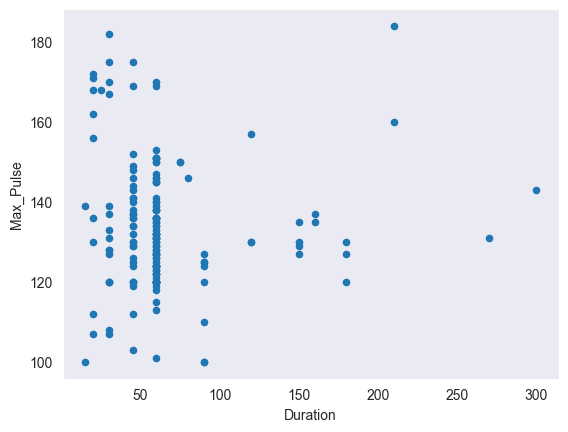

In [88]:
#6. พล็อตข้อมูล Max_Pulse เทียบกับ Duration
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('exercise_data_full.csv')
df.plot(kind='scatter',x='Duration',y='Max_Pulse')
plt.show()

In [89]:
# 7. แสดงค่าสัมประสิทธิ์สหสัมพันธ์ระหว่างตัวแปร(ตัวเลข)
print(df.corr())

                 Duration  Average_Pulse  Max_Pulse  Calorie_Burnage  \
Duration         1.000000      -0.165347   0.000895         0.888055   
Average_Pulse   -0.165347       1.000000   0.785566         0.017576   
Max_Pulse        0.000895       0.785566   1.000000         0.195850   
Calorie_Burnage  0.888055       0.017576   0.195850         1.000000   
Hours_Work      -0.115027      -0.275493  -0.266639        -0.139936   
Hours_Sleep      0.074435       0.034102   0.094540         0.081917   

                 Hours_Work  Hours_Sleep  
Duration          -0.115027     0.074435  
Average_Pulse     -0.275493     0.034102  
Max_Pulse         -0.266639     0.094540  
Calorie_Burnage   -0.139936     0.081917  
Hours_Work         1.000000    -0.144307  
Hours_Sleep       -0.144307     1.000000  


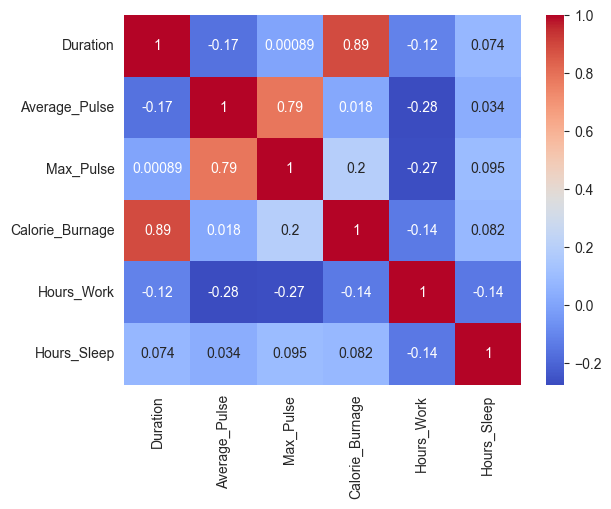

In [92]:
# 8. แสดงค่าสัมประสิทธิ์สหสัมพันธ์ระหว่างตัวแปร (Heatmap)
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import chi2_contingency
import seaborn as sns
import numpy as np

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()